In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
df_aug = pd.read_csv('/content/drive/MyDrive/data/8th_weather.csv')
df_july = pd.read_csv('/content/drive/MyDrive/data/july_weather.csv')


In [ ]:
df_aug.head()

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2021-08-01,북강릉(104),O,33.4,31.5,26.9,23.9,87.6,O,경고,X,높음
1,2021-08-01,동해(106),O,33.0,30.4,26.5,24.0,94.3,O,경고,X,높음
2,2021-08-01,서울(108),X,31.5,28.8,27.1,25.1,81.8,O,주의,O,보통
3,2021-08-01,인천(112),X,30.3,28.3,26.7,24.8,78.6,O,주의,X,보통
4,2021-08-01,원주(114),O,33.2,32.5,26.6,23.4,80.1,O,경고,X,보통


In [ ]:
df_aug.columns

Index(['일시', '지점', '폭염여부(O/X)', '최고체감온도(°C)', '최고기온(°C)', '평균기온(°C)',
       '최저기온(°C)', '평균상대습도(%)', '폭염특보(O/X)', '폭염영향예보(단계)', '열대야(O/X)',
       '자외선지수(단계)'],
      dtype='object')

In [ ]:
df_aug = df_aug.drop(['평균상대습도(%)', '폭염특보(O/X)', '폭염영향예보(단계)', '열대야(O/X)','자외선지수(단계)','폭염여부(O/X)'], axis=1)

In [ ]:
len(df_aug['일시'].unique())

21

In [ ]:
len(df_aug['지점'].unique())

162

In [ ]:
21*162

3402

In [ ]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   일시          3402 non-null   datetime64[ns]
 1   지점          3402 non-null   object        
 2   최고체감온도(°C)  3380 non-null   float64       
 3   최고기온(°C)    3391 non-null   float64       
 4   평균기온(°C)    3389 non-null   float64       
 5   최저기온(°C)    3391 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 159.6+ KB


In [ ]:
df_aug['일시'] = df_aug['일시'].astype('str')

In [ ]:
df_aug['일시']=pd.to_datetime(df_aug['일시'])

In [ ]:
df_aug['평균기온(°C)'][0] * 2

53.8

## 한국은 165개의 지역이 있다.

In [ ]:
g = pd.pivot_table(df_aug, index=['일시','지점'] )
g

최고기온(°C)  최고체감온도(°C)  최저기온(°C)  평균기온(°C)
일시         지점                                                 
2021-08-01 가평조종(505)      30.1        32.2      22.7      25.7
           간성(517)        30.8        33.8      24.3      26.9
           강진군(259)       32.9        34.5      25.3      28.4
           거제(294)        32.5        34.3      25.1      28.1
           거창(284)        33.4        34.5      23.1      26.6
...                        ...         ...       ...       ...
2021-08-21 화성(571)        28.0        30.1      21.7      24.0
           화순(741)        25.8        28.4      23.0      23.9
           화천(555)        24.7        28.3      20.1      21.4
           횡성(536)        26.4        29.2      20.7      22.8
           흑산도(169)       29.0        31.8      24.0      26.2

[3402 rows x 4 columns]

In [ ]:
len(g.index)

3402

In [ ]:
h =list()
type(h)

list

# 결측치 확인
- 165개의 '지점' unique값이 있어야 된다
- 날짜별 165개 지역의 관측값이 다 있어야 된다.
- 결측치는 각 컬럼의 평균으로 채운다.





In [ ]:
df_aug.isnull().sum()

일시             0
지점             0
최고체감온도(°C)    22
최고기온(°C)      11
평균기온(°C)       0
최저기온(°C)      11
dtype: int64

In [ ]:
df_aug[df_aug['지점'].str.contains('고창')]

,일시,지점,최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C)
29,2021-08-01,고창(172),33.6,32.0,27.3,24.6
191,2021-08-02,고창(172),32.2,30.1,26.0,24.0
353,2021-08-03,고창(172),33.5,32.3,27.4,23.9
515,2021-08-04,고창(172),34.3,33.5,28.0,23.7
677,2021-08-05,고창(172),34.7,34.0,28.3,23.3
839,2021-08-06,고창(172),34.9,34.0,27.9,23.9
1001,2021-08-07,고창(172),33.5,32.5,26.7,23.0
1163,2021-08-08,고창(172),31.9,29.9,25.8,23.3
1325,2021-08-09,고창(172),32.3,31.7,26.9,22.5
1487,2021-08-10,고창(172),32.9,32.3,26.6,22.9


In [ ]:
df_aug[df_aug['평균기온(°C)'].isna()]

,일시,지점,최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C)
599,2021-08-04,논산(615),34.4,NaN,NaN,NaN
601,2021-08-04,청양(618),33.7,NaN,NaN,NaN
740,2021-08-05,안산(545),33.6,NaN,NaN,NaN
896,2021-08-06,간성(517),34.5,NaN,NaN,NaN
922,2021-08-06,서천(614),34.3,33.1,NaN,23.7
1058,2021-08-07,간성(517),32.5,NaN,NaN,NaN
1084,2021-08-07,서천(614),32.2,NaN,NaN,NaN
1117,2021-08-07,청도(813),35.9,NaN,NaN,NaN
2237,2021-08-14,순천시(712),30.0,NaN,NaN,NaN
2685,2021-08-17,경기광주(546),30.8,NaN,NaN,NaN


In [ ]:
pp = df_aug[df_aug['지점']==df_aug.iloc[5]['지점']]
pp

,일시,지점,최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C)
5,2021-08-01,울릉도(115),31.8,29.3,27.0,25.7
167,2021-08-02,울릉도(115),32.7,30.0,27.3,25.8
329,2021-08-03,울릉도(115),33.8,31.1,27.7,25.8
491,2021-08-04,울릉도(115),34.7,32.2,28.2,25.7
653,2021-08-05,울릉도(115),34.6,32.1,28.6,25.9
815,2021-08-06,울릉도(115),33.7,31.1,27.9,25.6
977,2021-08-07,울릉도(115),33.7,31.8,28.5,25.8
1139,2021-08-08,울릉도(115),30.7,27.2,24.5,21.4
1301,2021-08-09,울릉도(115),27.3,24.5,22.7,20.4
1463,2021-08-10,울릉도(115),26.6,24.0,22.4,20.9


In [ ]:
df_aug['평균기온(°C)'].mean()

25.4619341563786

In [ ]:
d = df_aug[df_aug['평균기온(°C)'].isna()].index
d.to_list()

for i in d:
    mask =i
    df_aug.loc[mask,'평균기온(°C)'] = df_aug.loc[mask, '지점'].mean()

In [ ]:
df_aug['평균기온(°C)'].isna().sum()

0

In [ ]:
import datetime

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
pp['지점']

KeyError: ignored

KeyError: ignored

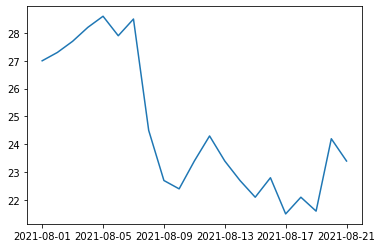

In [ ]:

plt.plot(pp['일시'], pp['평균기온(°C)'])
plt.title(pp[0]['지점']+'average temp')
plt.show()

In [ ]:

for i,h in g.index:
  h.extend(i)

AttributeError: ignored